## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

## Chapter-006-004C-Clustering-K-Means-Edinburgh

In [1]:
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt

from time import time
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

from PIL import Image

# Load the Edinburgh Castle

In [2]:
imagepath = '../../Data/edinburgh-castle.jpg'
im = Image.open(imagepath)
print(im.format)
print(im.mode)
height, width=im.size
print('Height=%d, Width=%d' % (height, width))
print(im.palette)

JPEG
RGB
Height=1910, Width=983
None


In [3]:
im2=im
im2.thumbnail((400, 400))

Height=400, Width=205


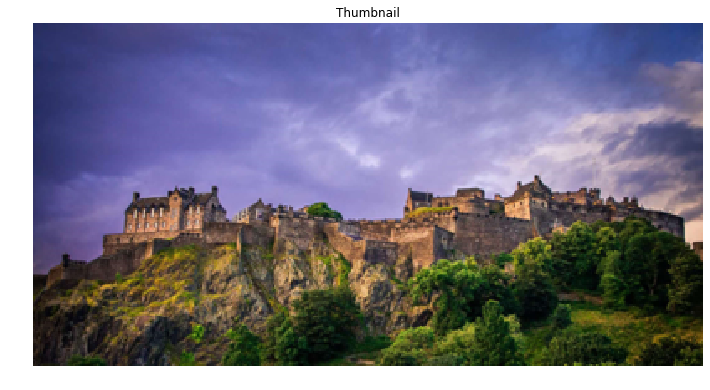

In [4]:
fig0 = plt.figure(1, figsize=(12, 9))
plt.clf()
plt.axis('off')
plt.title('Thumbnail')
plt.imshow(im2)
height, width=im2.size
print('Height=%d, Width=%d' % (height, width))

In [5]:
n_colors = 64

Convert to floats instead of the default 8 bits integer coding. 
Dividing by 255 is important so that plt.imshow behaves works well on float data 
(need to be in the range [0-1])

In [6]:
im = np.array(im, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.

In [7]:
w, h, d = original_shape = tuple(im.shape)
assert d == 3
image_array = np.reshape(im, (w * h, d))

In [8]:
print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("Completed in %0.5fs." % (time() - t0))

Fitting model on a small sub-sample of the data
Completed in 0.59299s.


In [9]:
# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("Completed in %0.5fs." % (time() - t0))

Predicting color indices on the full image (k-means)
Completed in 0.14400s.


In [10]:
codebook_random = shuffle(image_array, random_state=0)[:n_colors]
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print("Completed in %0.5fs." % (time() - t0))

Predicting color indices on the full image (random)
Completed in 0.16800s.


# Recreate the (compressed) image from the code book & labels

In [11]:
def recreate_image(codebook, labels, w, h):
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Create Results Directory

In [12]:
imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06'])
print(imagepath)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 06


In [13]:
if not os.path.exists(imagepath):
    os.makedirs(imagepath)

# Display all results, alongside original image

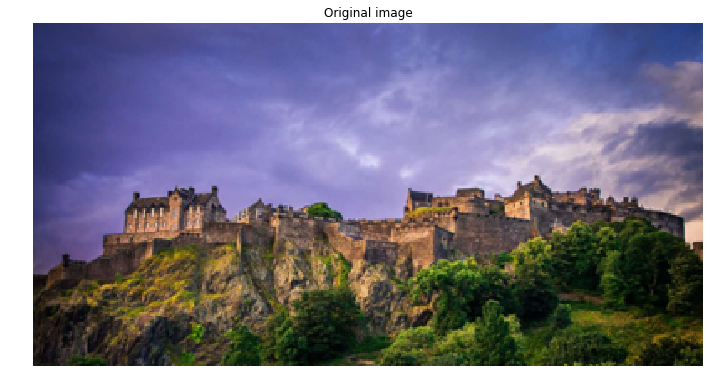

In [14]:
fig1= plt.figure(1, figsize=(12, 9))
plt.clf()
plt.axis('off')
plt.title('Original image')
plt.imshow(im)
plt.show()

In [15]:
imagename1 = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06','Chapter-006-004C-Clustering-K-Means-Edinburgh-01.jpg'])
fig1.savefig(imagename1, bbox_inches='tight')

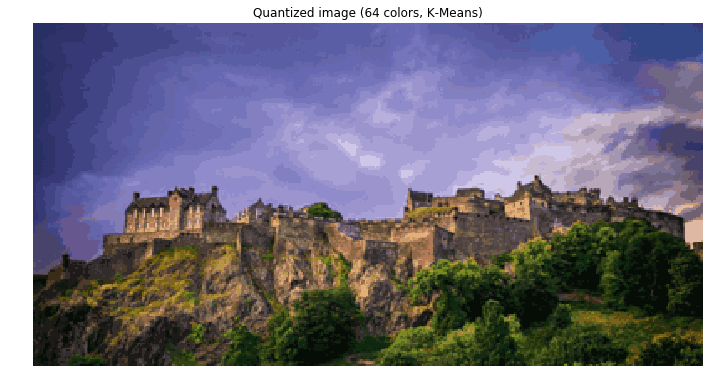

In [16]:
fig2 = plt.figure(2, figsize=(12, 9))
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
plt.show()

In [17]:
imagename2 = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06','Chapter-006-004C-Clustering-K-Means-Edinburgh-02.jpg'])
fig2.savefig(imagename2, bbox_inches='tight')

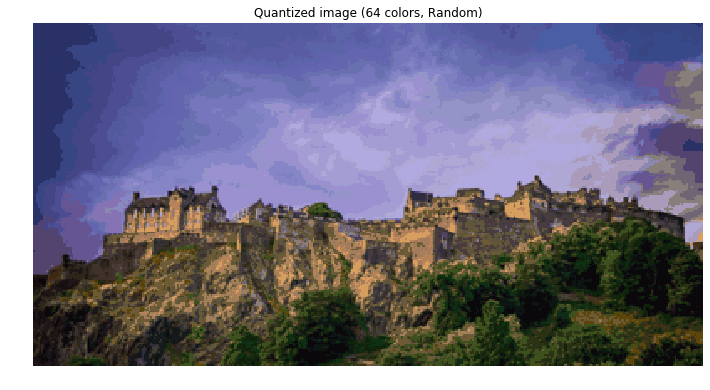

In [18]:
fig3 = plt.figure(3, figsize=(12, 9))
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

In [19]:
imagename3 = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06','Chapter-006-004C-Clustering-K-Means-Edinburgh-03.jpg'])
fig3.savefig(imagename3, bbox_inches='tight')

## Done

In [20]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-04-20 09:48:39.397041
